In [0]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content'

In [4]:
!mkdir train
!mkdir test

mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists


In [5]:
!tar -xf /content/drive/My Drive/Train.tar.gz\ Drive/Test.tar.gz -C test

tar: /content/drive/My: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [0]:
!tar -xf  '/content/drive/My Drive/Train.tar.gz' -C '/content/train'

In [0]:
!tar -xf  '/content/drive/My Drive/Test.tar.gz' -C '/content/test'

In [8]:
ls train

testset/  testset.csv


In [9]:
# number of images in the training set
!ls train/testset | wc -l

9600


In [10]:
# number of images in the testing set
!ls test/testset | wc -l

2609


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
#from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras import backend as K 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model


In [0]:
img_width = 224
img_height = 224

In [0]:
def pre(img):
    img = (img/127.5)-1
    return img

In [0]:
import pandas as pd

In [0]:
test_csv = pd.read_csv('test/testset.csv',dtype=str)


In [0]:
train_csv = pd.read_csv('train/testset.csv',dtype=str)

In [17]:
datagen=ImageDataGenerator()
train_generator=datagen.flow_from_dataframe(dataframe=train_csv, directory="train/testset",\
                                            x_col="Data", y_col="Label", \
                                            class_mode="categorical", target_size=(img_width,img_height), \
                                            batch_size=32,\
                                            preprocessing_function=lambda x: (img/127.5)-1)

Found 9600 validated image filenames belonging to 48 classes.


In [18]:

test_generator=datagen.flow_from_dataframe(dataframe=test_csv, directory="test/testset",\
                                            x_col="Data", y_col="Label",\
                                            class_mode="categorical", target_size=(img_width,img_height),\
                                            batch_size=32,\
                                           preprocessing_function=lambda x: (img/127.5)-1)

Found 2609 validated image filenames belonging to 48 classes.


In [0]:
base_model=MobileNet(input_shape=(224, 224, 3), include_top = False, weights = 'imagenet')

In [0]:
for layer in base_model.layers[:20]:
    layer.trainable = False
for layer in base_model.layers[20:]:
    layer.trainable = True

In [0]:
global_average_layer = GlobalAveragePooling2D()
prediction_layer = Dense(48,activation ='softmax')

In [0]:
model = Sequential([
  base_model,
  global_average_layer,
  prediction_layer,
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# model.fit(train_generator, validation_data=test_generator,
#                    epochs=10)

In [0]:
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=test_generator.n//test_generator.batch_size


In [0]:
# STEP_SIZE_TRAIN

In [27]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=250,
                    validation_data=test_generator,
                    validation_steps=60,
                    epochs=8)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
250/250 [==============================] - 65s 258ms/step - loss: 0.6030 - accuracy: 0.8595 - val_loss: 0.2914 - val_accuracy: 0.9276
Epoch 2/8
250/250 [==============================] - 64s 258ms/step - loss: 0.0717 - accuracy: 0.9850 - val_loss: 1.3286 - val_accuracy: 0.6594
Epoch 3/8
250/250 [==============================] - 63s 254ms/step - loss: 0.0563 - accuracy: 0.9871 - val_loss: 0.0946 - val_accuracy: 0.9844
Epoch 4/8
250/250 [==============================] - 63s 251ms/step - loss: 0.0429 - accuracy: 0.9906 - val_loss: 0.0746 - val_accuracy: 0.9833
Epoch 5/8
250/250 [==============================] - 62s 250ms/step - loss: 0.0304 - accuracy: 0.9930 - val_loss: 0.0944 - val_accuracy: 0.9802
Epoch 6/8
250/250 [==============================] - 63s 253ms/step - loss: 0.0108 - accuracy: 0.9973 - val_loss: 0.0315 - val_accuracy: 0.9964
Epoch 7/8
250/250 [==============================] - 63s 253

In [0]:
model.save('model.h5')

In [0]:
import matplotlib.pyplot as plt

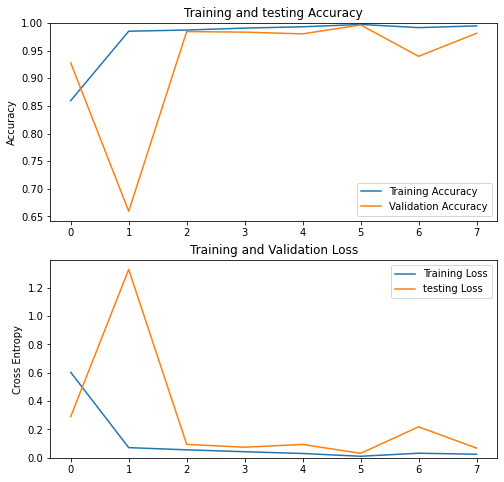

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and testing Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()